# Importing Libraries

In [36]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.nlp import *

# Loading the Data

In [37]:
df_bg = pd.read_csv('../datasets/games-cleaned.csv')

# Topic Modeling

In [38]:
bg_nlp = df_bg[['name', 'description']].copy()
bg_nlp

,name,description
0,Pandemic,"In Pandemic, several virulent diseases have br..."
1,Carcassonne,Carcassonne is a tile-placement game in which ...
2,Catan,"In CATAN (formerly The Settlers of Catan), pla..."
3,7 Wonders,You are the leader of one of the 7 great citie...
4,Dominion,"&quot;You are a monarch, like your parents bef..."
...,...,...
4577,Feierabend,"Welcome to Feierabend, a.k.a. Finishing Time, ..."
4578,Nations at War: White Star Rising,Publisher's blurb:&#10;&#10;&quot;White Star R...
4579,Oaxaca: Crafts of a Culture,Among the many reasons that Oaxaca (pronounced...
4580,A Gentle Rain,"TAKE A DEEP BREATH, AND RELAX...&#10;&#10;You ..."


In [39]:
bg_nlp = setup(bg_nlp, target = 'description', custom_stopwords = ['player', 'card', 'play', 'game', 'use', 'time', 'take', 'turn', 'new', 'action'], session_id=42)

Description,Value
session_id,42
Documents,4582
Vocab Size,17103
Custom Stopwords,True


In [40]:
lda = create_model('lda', num_topics = 8, multi_core = True)
lda_results = assign_model(lda)
lda_results.head()

,name,description,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Dominant_Topic,Perc_Dominant_Topic
0,Pandemic,pandemic several virulent disease break simult...,0.001122,0.001119,0.001119,0.041379,0.001119,0.158400,0.001120,0.794622,Topic 7,0.79
1,Carcassonne,draw place tile piece southern french landscap...,0.001952,0.001951,0.001953,0.083862,0.001952,0.001952,0.904424,0.001954,Topic 6,0.90
2,Catan,formerly try dominant settlement city road dic...,0.023506,0.000621,0.000621,0.139971,0.000621,0.000621,0.369814,0.464225,Topic 7,0.46
3,7 Wonders,leader great city ancient world gather resourc...,0.001228,0.001228,0.001228,0.001229,0.001229,0.001229,0.282023,0.710605,Topic 7,0.71
4,Dominion,parent ruler small pleasant kingdom river ever...,0.001229,0.001230,0.504262,0.085359,0.001231,0.041157,0.073331,0.292201,Topic 2,0.50


In [41]:
plot_model()

In [42]:
lda_results['Dominant_Topic'].value_counts()

Topic 7    1145
Topic 6     925
Topic 4     653
Topic 3     541
Topic 2     426
Topic 5     397
Topic 0     308
Topic 1     187
Name: Dominant_Topic, dtype: int64

In [43]:
plot_model(lda, plot = 'topic_distribution')

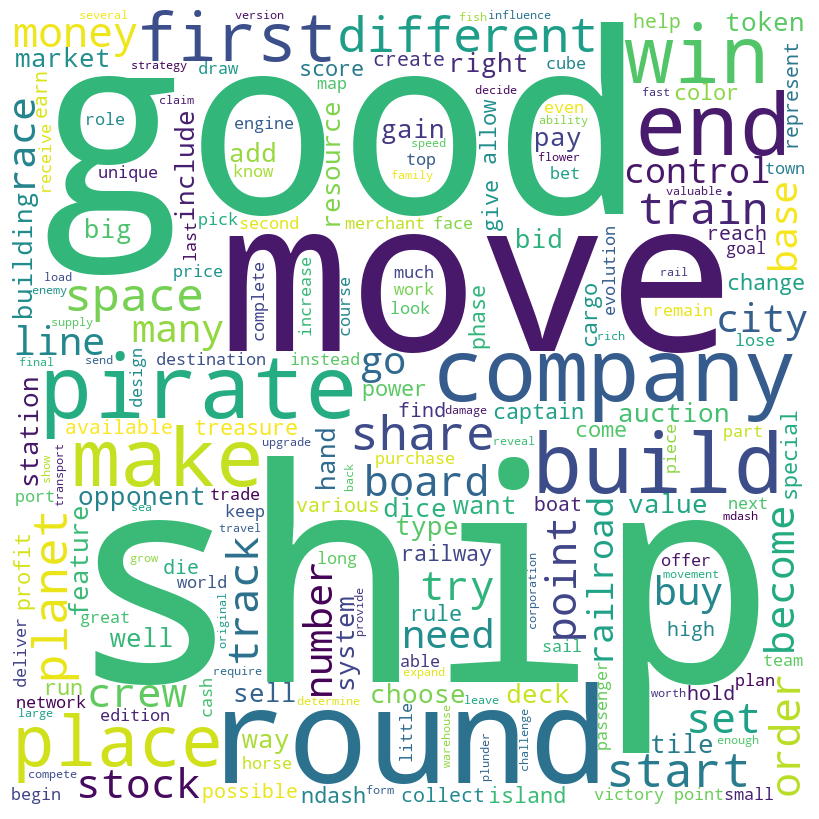

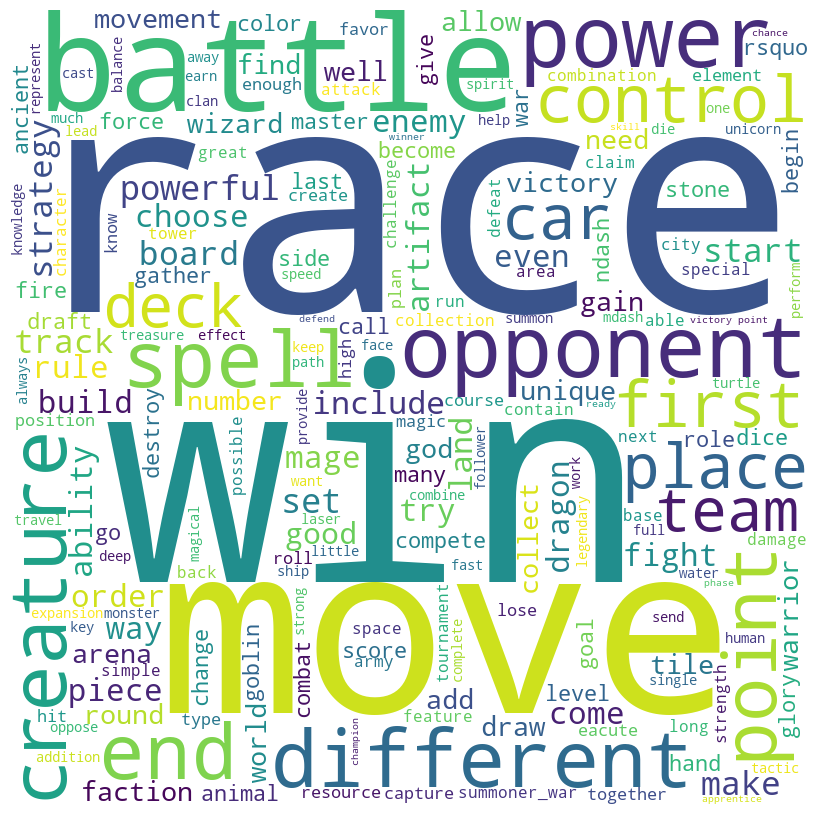

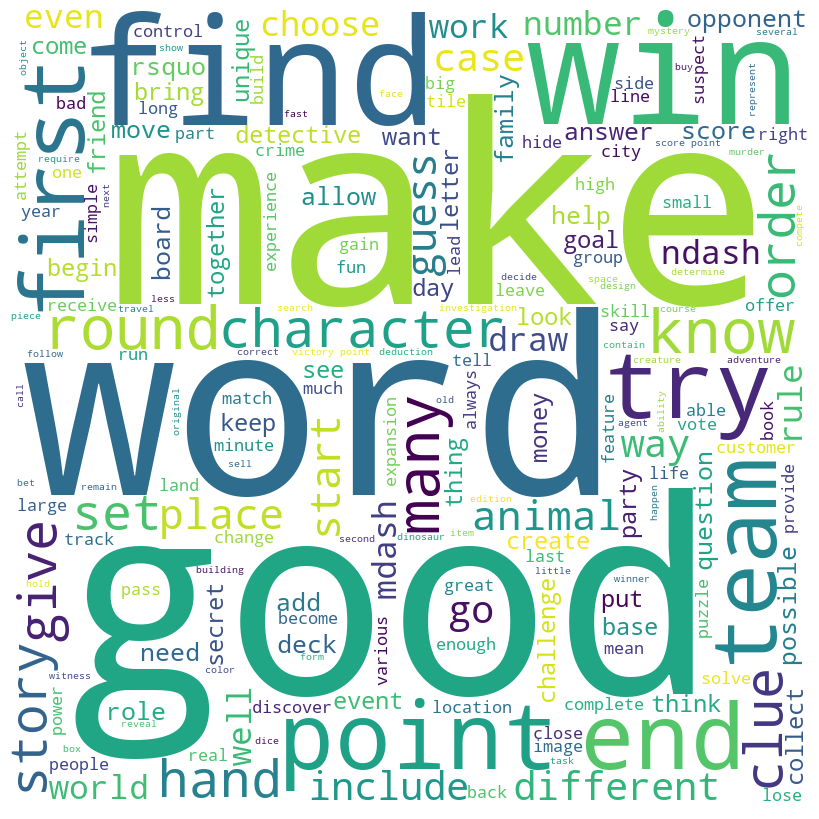

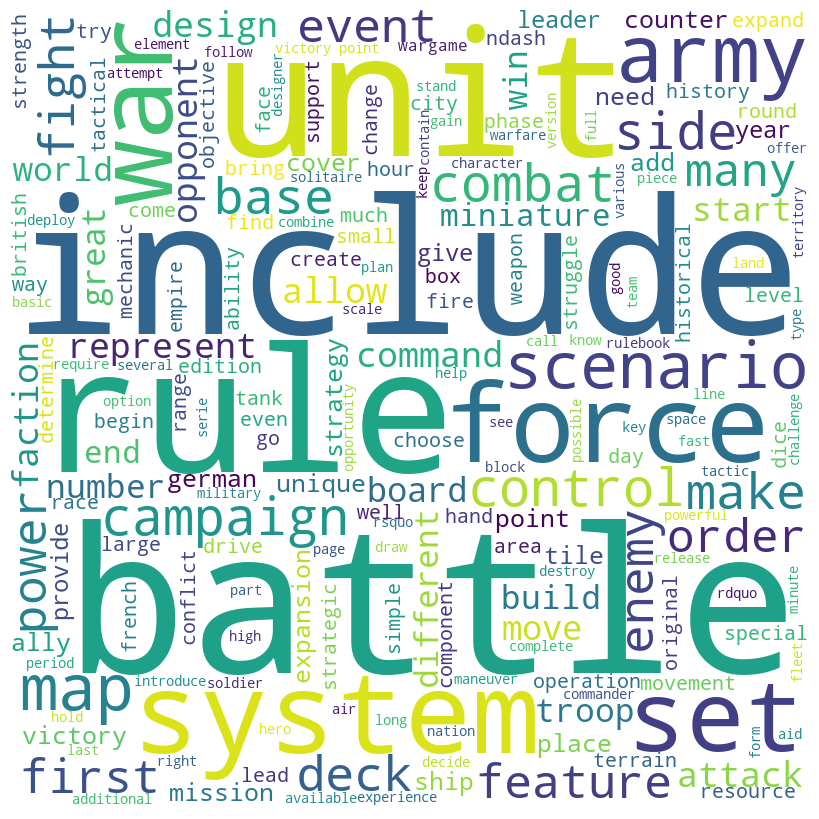

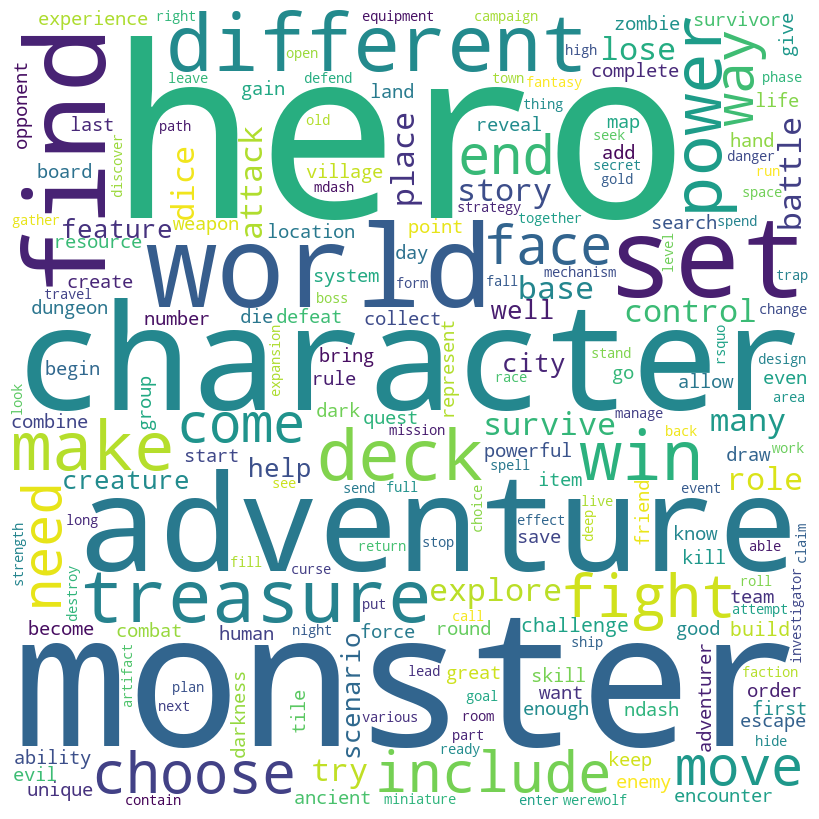

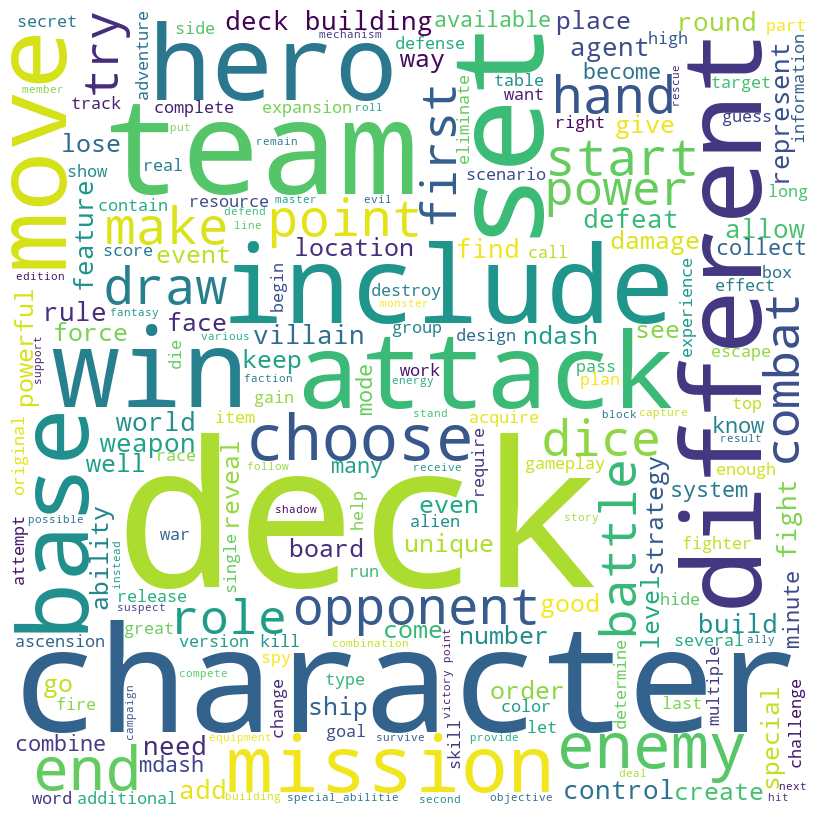

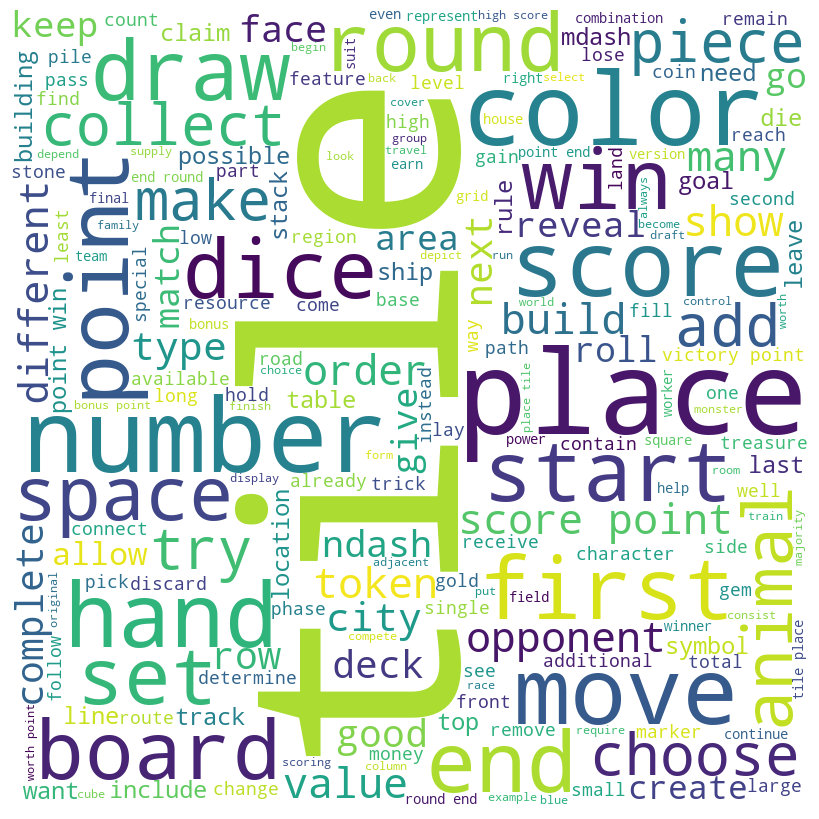

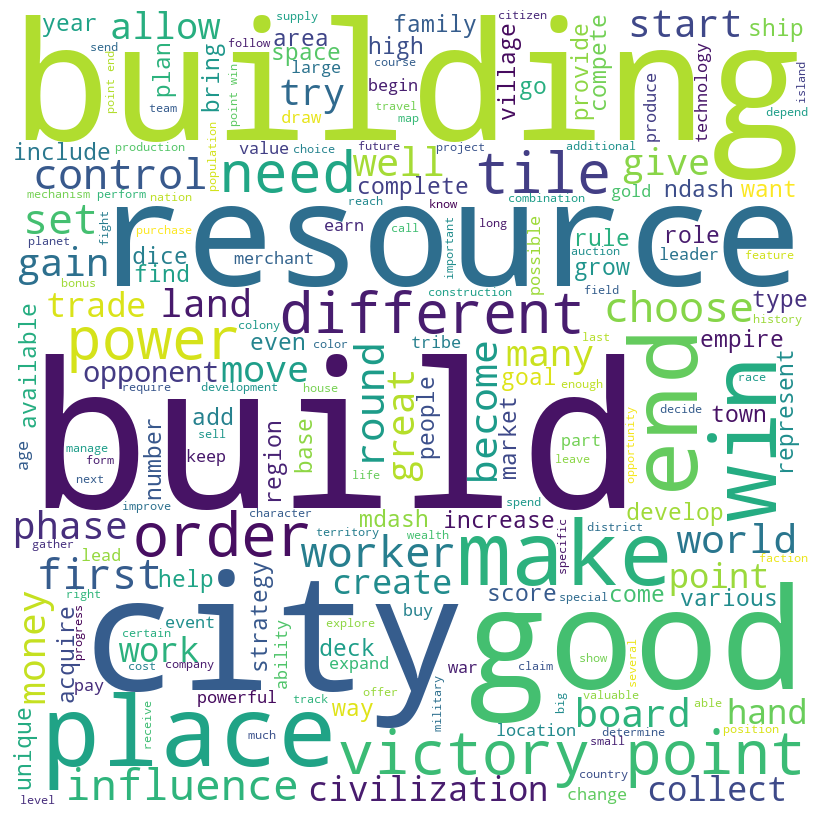

In [44]:
for i in range(8):
    plot_model(lda, plot = 'wordcloud', topic_num=f'Topic {i}')

In [45]:
# plot_model(lda, plot = 'wordcloud', topic_num=f'Topic 0', save=True)

In [46]:
# evaluate_model(lda)